# Implement Back Propagation from Scratch

- Very simple implementation of a neural net with a single layer
- Not optimized/vectorized, but that's okay...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

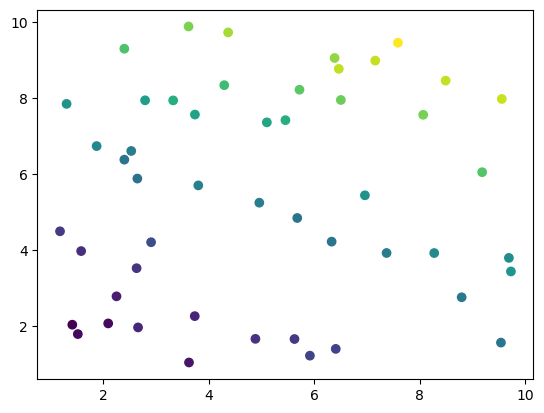

In [2]:
## Let's make an input matrix:

np.random.seed(42)

#Some synthetic data
N = 50

#Random points:
x1 = np.random.uniform(1, 10, N)
x2 = np.random.uniform(1, 10, N)

#Linear equation:
y = x1*2 + x2**1.5 + np.random.normal(loc=0, scale=1, size=N)

#Let's reshape y to be Nx1
y = y.reshape(-1,1)

#Plot our data:
plt.scatter(x1, x2, c=y);

In [3]:
##Input Matrix:
X = np.c_[x1, x2]
X.shape

(50, 2)

In [4]:
##We'll have just two layers, in addition to input layer: A hidden layer, and output layer

In [39]:
#Now, let's initialize a single hidden layer, gets the inputs
num_hidden = 8


In [50]:
#Our hidden incoming weights are our bias term + the two inputs
#Initialize to normal randoms
sig = np.sqrt(1/(num_hidden + 3)/2)
#sig = 1
weights1 = np.random.normal(0, np.sqrt(1/(num_hidden + 3)/2), (X.shape[1] + 1, num_hidden))

#So, we have 3 inputs onto X neurons
weights1.shape

#weights1.transpose().shape

(3, 8)

In [51]:
#And output weights?
#Bias plus number of outputs, which is just 1
sig = np.sqrt(1/(num_hidden + 1)/2)
#sig = 1
weights2 = np.random.normal(0, sig, (num_hidden + 1, y.shape[1]))
weights2.shape

(9, 1)

In [52]:
##Let's augment our input with a 1 for the bias for the first layer:
X_aug = np.c_[np.ones((N,1)), x1, x2]
X_aug.shape

(50, 3)

In [53]:
#Define our activation function for the hidden nodes:

def sigmoid(x, derivative=False):
    if (derivative):
        return sigmoid(x) * (1 - sigmoid(x))
    else:
        return 1 / (1 + np.exp(-x))

In [54]:
def g0(x, derivative=False):
    if (derivative):
        return 1
    else:
        return x

In [55]:
#Use sigmoid activation function
g = sigmoid

In [60]:
#Let's run the method...

# Learning rate
alpha = .001


#Pre-allocate matrices for partal derivatives:
partial_E_layer1 = np.zeros([len(X), num_hidden, X_aug.shape[1]])
partial_E_layer2 = np.zeros([len(X), num_hidden + 1])

num_iters = 10000


# Run gradient descent
for index in range(num_iters):

    #First we do the forward pass:
    #Calculate all activation values
    #All outputs
    #And all local errors (delta_js)
   
    #Do for each observation:
    for obs in range(len(X)):
        
        ## Forward Pass:
        ############
        
        x = X_aug[obs, :]
        
        delta_Ed = 0
        
        #Calculate the activation values:
        #First layer:
        #Want an Xx1
        a_1 = np.zeros((num_hidden,1))
        
        #Get Xx1 of activation terms
        a_1 = weights1.transpose().dot(x)
        
        #Now calculate the outputs:
        #Use activation function
        o_1 = g(a_1)
        
        #Add a 1 to the beginning for bias:
        o_1 = np.r_[1, o_1]
        
        
        ## Now that we have outputs from layer 1, the only hidden layer, let get a_2 and o_2 = y_hat
        #####
        a_2 = weights2.transpose().dot(o_1)
        
        #And output transformed by g0:
        o_2 = g0(a_2)
        
        y_hat = o_2
        
        
        ## Now the backward pass:
        #########
        
        #Calculate delta_js:
        #########
        #delta_1 at final layer, which is layer 2
        y_true = y[obs]
        delta_2 = g0(a_2, derivative=True) * (y_hat - y_true)
        
        
        ## Now delta_js for layer 1, the only hidden layer:
        ## No explicit summation because final layer only has one node
        delta_1 = np.zeros((num_hidden, 1))
        for j in range(num_hidden):
            delta_1[j] = g(a_1[j], derivative=True) * weights2[j] * delta_2
        
        #print(delta_1.shape)
        #Given the delta_js, we can calculate delta_Es:
        partial_E_layer1[obs, :, :] = delta_1 * x
        
        partial_E_layer2[obs, :] = delta_2 * o_1
        
        #partial_E_layer1 = delta_1 * x
        
        #partial_E_layer2 = delta_2 * o_1
        
    ## Get average of partial derivatives
    partial_E_layer1_avg = np.mean(partial_E_layer1, axis=0)
    partial_E_layer2_avg = np.mean(partial_E_layer2, axis=0)


    #And update weights:
    weights1 = weights1 - alpha * partial_E_layer1_avg.transpose()

    #print(weights2.shape)
    #print(partial_E_layer2_avg.shape)
    weights2 = weights2 - alpha * partial_E_layer2_avg.reshape(-1,1)
    

    #print(index)
#(y_hat - y_true)

In [61]:
#Now calculate y_hat for the trained network:
############

y_hat = np.zeros([len(X),1])

for obs in range(len(X)):

    ## Forward Pass:
    ############

    x = X_aug[obs, :]
    
    delta_Ed = 0

    #Calculate the activation values:
    #First layer:
    a_1 = np.zeros((num_hidden,1))

    #Get activation terms
    a_1 = weights1.transpose().dot(x)

    #Now calculate the outputs:
    #Use activation function
    o_1 = g(a_1)

    #Add a 1 to the beginning for bias:
    o_1 = np.r_[1, o_1]


    ## Now that we have outputs from layer 1, the only hidden layer, let get a_2 and o_2 = y_hat
    #####
    a_2 = weights2.transpose().dot(o_1)

    #And output transformed by g0:
    o_2 = g0(a_2)

    y_hat[obs] = o_2
    
    

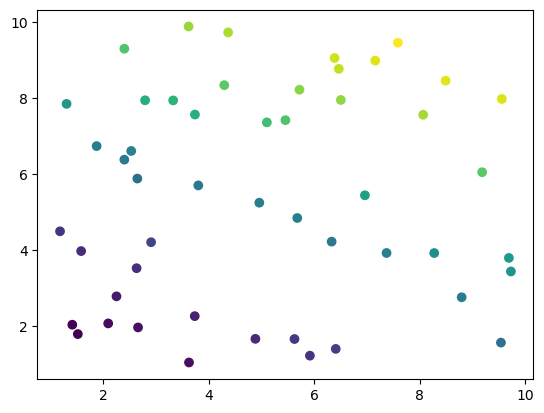

In [62]:
#Plot our predictions:
######
plt.scatter(x1, x2, c=y_hat);

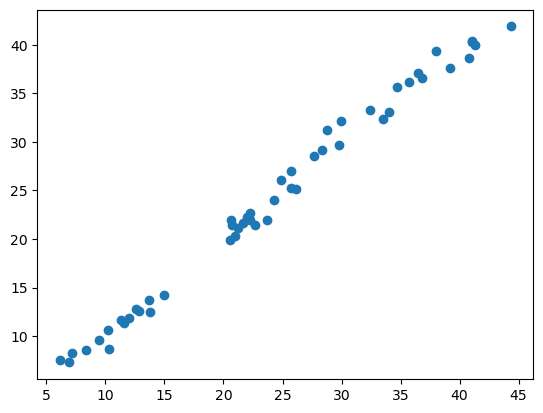

In [63]:
#Predictions and truth?
#####

plt.scatter(y, y_hat)